## The Sparks Foundation



 ## Task #2 : Prediction using Unsupervised Learning - Iris Dataset


-  To predict the optimum number of clusters and represent it visually

### By Sneha Jha

#### Import Packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Reading Data

In [44]:
df_iris = pd.read_csv('IRIS.csv')

In [45]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


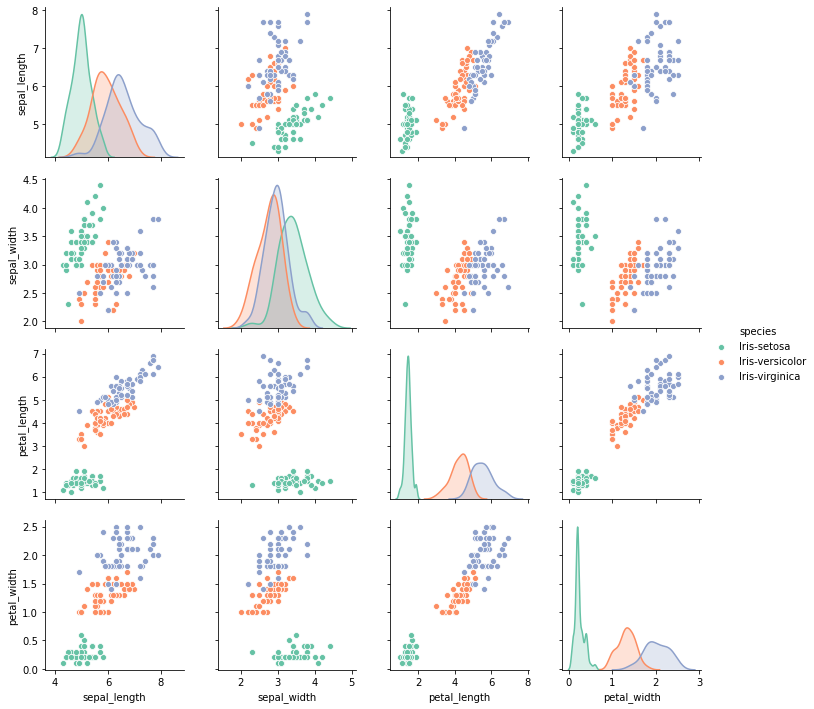

In [47]:
import seaborn as sns
sns.pairplot(data=df_iris, hue='species' , palette ='Set2')
plt.show()

### Observation : Iris-setosa is easily separable from the other two.

### Now let's find the labels - K-means Clustering

#### Dataset for unsupervised learning

In [48]:
features = df_iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]

## As the labels are unknown to us, we will find the best number of clusters to get more accurate results(Kmeans)

## I will use Elbow rule to find the optimum number of clusters

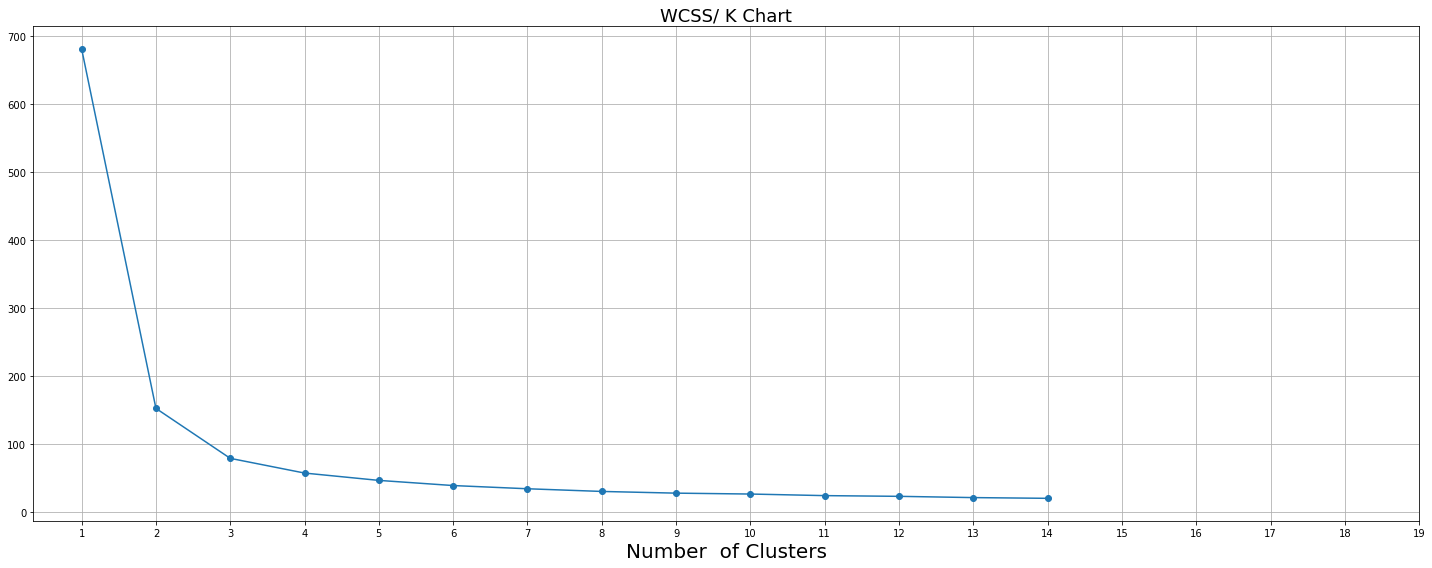

In [49]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(20,8))
plt.title("WCSS/ K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Number  of Clusters",fontsize=20)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

### Observation : By Elbow Rule, we can say that 2 or 3 can be our best values for clusters.

### Evaluate our results---

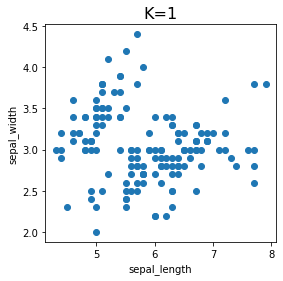

In [50]:
plt.figure(figsize=(24,4))
plt.title("KMeans Clustering", fontsize= 20)

plt.subplot(1,5,1)
plt.title("K=1", fontsize = 16)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.scatter(features.sepal_length, features.sepal_width)

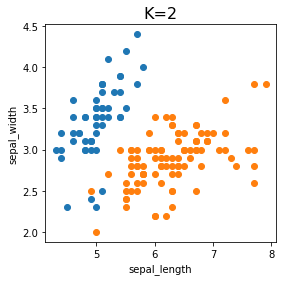

In [51]:
plt.figure(figsize=(24,4))
plt.title("KMeans Clustering", fontsize= 20)

plt.subplot(1,5,1)
plt.title("K=2", fontsize = 16)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
kmeans = KMeans(n_clusters = 2)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.sepal_length[features.labels==0], features.sepal_width[features.labels==0])
plt.scatter(features.sepal_length[features.labels==1], features.sepal_width[features.labels==1])

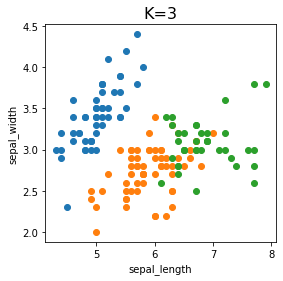

In [52]:
plt.figure(figsize=(24,4))
plt.title("KMeans Clustering", fontsize= 20)

plt.subplot(1,5,1)
plt.title("K=3", fontsize = 16)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
kmeans = KMeans(n_clusters = 3)
features['labels'] = kmeans.fit_predict(features)
plt.scatter(features.sepal_length[features.labels==0], features.sepal_width[features.labels==0])
plt.scatter(features.sepal_length[features.labels==1], features.sepal_width[features.labels==1])
plt.scatter(features.sepal_length[features.labels==2], features.sepal_width[features.labels==2])

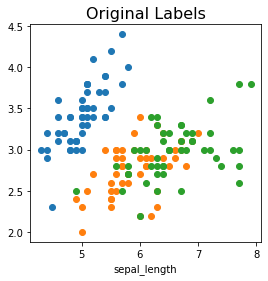

In [53]:
plt.figure(figsize=(24,4))
plt.title("KMeans Clustering", fontsize= 20)
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("sepal_length")
plt.scatter(df_iris.sepal_length[df_iris.species == "Iris-setosa"],df_iris.sepal_width[df_iris.species == "Iris-setosa"])
plt.scatter(df_iris.sepal_length[df_iris.species == "Iris-versicolor"],df_iris.sepal_width[df_iris.species == "Iris-versicolor"])
plt.scatter(df_iris.sepal_length[df_iris.species == "Iris-virginica"],df_iris.sepal_width[df_iris.species == "Iris-virginica"])

### Kmeans visibly did an amazing job with 3 clusters. I can say prediction is identical to the original with labels, which shows that our ELBOW chart was right.

### THANK YOU!